# Stock Cost Time-Series Predicter App
This notebook gonna show  you how to predict a time-series using a LSTM tecnique and create a succesful model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import pandas_datareader as dt
import datetime as date

from  sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout, LSTM
from tensorflow.keras.models import Sequential


Adding local variable for Yahoo finance

In [ ]:
ticker='CNY=X'   ## USD-China Yuan
start_date = date.datetime(2020,1,1)
end_date=date.datetime.now()


In [ ]:
data = dt.DataReader(name=ticker, data_source='yahoo', start=start_date,end=end_date )
data.head(15)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,6.9623,6.9622,6.9623,6.9623,0,6.9623
2020-01-02,6.9730,6.9598,6.9622,6.9622,0,6.9622
2020-01-03,6.9744,6.9591,6.9634,6.9634,0,6.9634
2020-01-06,6.9775,6.9645,6.9645,6.9645,0,6.9645
2020-01-07,6.9750,6.9308,6.9745,6.9745,0,6.9745
2020-01-08,6.9530,6.9315,6.9444,6.9444,0,6.9444
2020-01-09,6.9516,6.9451,6.9452,6.9452,0,6.9452
2020-01-10,6.9560,6.9093,6.9517,6.9517,0,6.9517
2020-01-13,6.9142,6.8837,6.9093,6.9093,0,6.9093


## Normalize the "Close" cost

In [ ]:
Close = data['Close']
scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(Close.values.reshape(-1,1))
scaledData.shape

(461, 1)

## Split training and test data set
we have 461 day  cost data, I'm gonna split the data set, first 400 days  as training set and rest of them as test datasets.


In [ ]:
training_set = scaledData[:400]
test_set = scaledData[400:]

training_set.shape, test_set.shape

((400, 1), (61, 1))

## Create a model 

In [ ]:
period=60 
X_train = []
y_train = []
for x in range(period, len(training_set)):
    X_train.append(training_set[x-period:x, 0])
    y_train.append(training_set[x, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape, y_train.shape

((340, 60, 1), (340,))

In [ ]:
model = Sequential()
#First
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Second
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Third 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Fourth
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
#  output layer
model.add(Dense(units = 1))
# Compiling
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 8s 124ms/step - loss: 0.0943
Epoch 2/100
11/11 [==============================] - 2s 138ms/step - loss: 0.0243
Epoch 3/100
11/11 [==============================] - 1s 132ms/step - loss: 0.0101
Epoch 4/100
11/11 [==============================] - 1s 133ms/step - loss: 0.0103
Epoch 5/100
11/11 [==============================] - 2s 136ms/step - loss: 0.0097
Epoch 6/100
11/11 [==============================] - 1s 136ms/step - loss: 0.0067
Epoch 7/100
11/11 [==============================] - 1s 132ms/step - loss: 0.0090
Epoch 8/100
11/11 [==============================] - 2s 139ms/step - loss: 0.0071
Epoch 9/100
11/11 [==============================] - 1s 132ms/step - loss: 0.0056
Epoch 10/100
11/11 [==============================] - 1s 134ms/step - loss: 0.0059
Epoch 11/100
11/11 [==============================] - 2s 138ms/step - loss: 0.0062
Epoch 12/100
11/11 [==============================] - 1s 133ms/step - loss: 0.0059
Epoch 13/100


In [ ]:
dataset_train = data.iloc[:400,3:4]
dataset_test = data.iloc[400:,3:4]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - period:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(period, len(inputs)):
    X_test.append(inputs[i-period:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(61, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [ ]:
dataset_test.values

array([[6.46750021],
       [6.46829987],
       [6.46010017],
       [6.47819996],
       [6.48939991],
       [6.48390007],
       [6.46700001],
       [6.46969986],
       [6.48040009],
       [6.48169994],
       [6.50969982],
       [6.48939991],
       [6.45529985],
       [6.46049976],
       [6.46099997],
       [6.46920013],
       [6.46519995],
       [6.46029997],
       [6.48250008],
       [6.48519993],
       [6.4849    ],
       [6.47819996],
       [6.47830009],
       [6.4763999 ],
       [6.47359991],
       [6.48509979],
       [6.48320007],
       [6.49370003],
       [6.49160004],
       [6.48000002],
       [6.46990013],
       [6.47489977],
       [6.48050022],
       [6.47079992],
       [6.46509981],
       [6.45959997],
       [6.45900011],
       [6.45539999],
       [6.45190001],
       [6.45669985],
       [6.46549988],
       [6.46070004],
       [6.45429993],
       [6.44339991],
       [6.45079994],
       [6.43830013],
       [6.43139982],
       [6.456

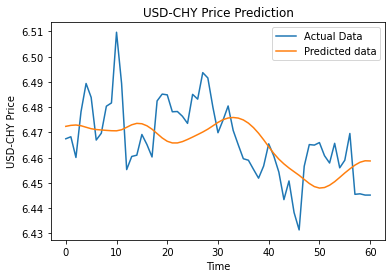

In [ ]:

mpl.pyplot.plot(dataset_test.values,label="Actual Data")
mpl.pyplot.plot(predicted_stock_price,label="Predicted data")
mpl.pyplot.title('USD-CHY Price Prediction')
mpl.pyplot.xlabel('Time')
mpl.pyplot.ylabel('USD-CHY Price')
mpl.pyplot.legend()
mpl.pyplot.show()